# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Task 2 

### Task 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is F455-D01B

 Directory of C:\Users\Administrator\Desktop\Project

05/27/2020  06:31 PM    <DIR>          .
05/27/2020  06:31 PM    <DIR>          ..
05/09/2020  06:57 PM    <DIR>          .ipynb_checkpoints
05/27/2020  06:31 PM             8,938 covid19 data analysis notebook.ipynb
05/12/2020  01:35 PM    <DIR>          Dataset for practice
05/09/2020  06:54 PM    <DIR>          Datasets
               1 File(s)          8,938 bytes
               5 Dir(s)  31,711,444,992 bytes free


#### Let's check the shape of the dataframe

In [3]:
ls Datasets

 Volume in drive C has no label.
 Volume Serial Number is F455-D01B

 Directory of C:\Users\Administrator\Desktop\Project\Datasets

05/09/2020  06:54 PM    <DIR>          .
05/09/2020  06:54 PM    <DIR>          ..
05/09/2020  06:53 PM            87,580 covid19_Confirmed_dataset.csv
05/09/2020  06:53 PM             8,822 worldwide_happiness_report.csv
               2 File(s)         96,402 bytes
               2 Dir(s)  31,711,444,992 bytes free


### Task 2.2: Delete the useless columns

In [14]:
corona_ds_csv = pd.read_csv("Datasets/covid19_Confirmed_dataset.csv")
corona_ds_csv.head(0)
#headers = list(corona_ds_csv.head(0))
corona_ds_csv.shape

(266, 104)

In [18]:
corona_ds_csv.drop(["Lat","Long"],axis=1,inplace=True)
corona_ds_csv.shape

(266, 102)

### Task 2.3: Aggregating the rows by the country

In [26]:
corona_aggregated = corona_ds_csv.groupby("Country/Region").sum()
corona_aggregated.shape

(187, 100)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

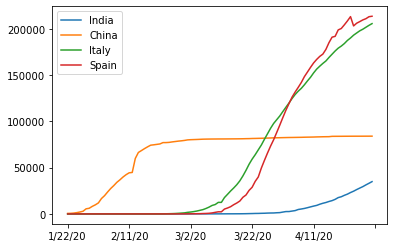

In [40]:
#corona_aggregated.loc["India"].plot()
#corona_aggregated.loc["Pakistan"].plot()
#corona_aggregated.loc["Spain"].plot()
desh = ["India","China","Italy","Spain"]
for i in desh:
    corona_aggregated.loc[i].plot()
plt.legend()

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

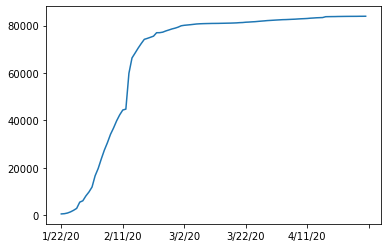

In [42]:
corona_aggregated.loc['China'].plot()

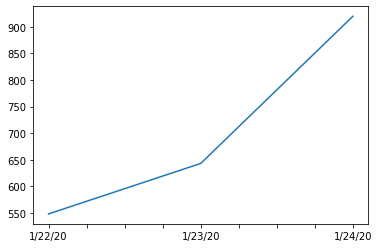

In [43]:
corona_aggregated.loc['China'][:3].plot()

### task 3.1: caculating the first derivative of the curve

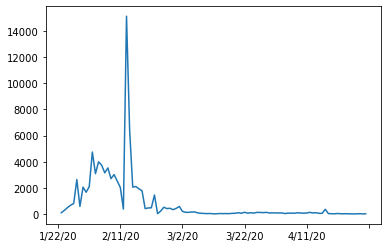

In [44]:
corona_aggregated.loc["China"].diff().plot()

### task 3.2: find maxmimum infection rate for China

In [46]:
for i in desh:
    print(i, " = ",corona_aggregated.loc[i].diff().max())

India  =  1893.0
China  =  15136.0
Italy  =  6557.0
Spain  =  9630.0


In [48]:
#for all countries:
countries = list(corona_aggregated.index)
max_infection_rate = []
for i in countries:
    max_infection_rate.append(corona_aggregated.loc[i].diff().max())
max_infection_rate

[232.0,
 34.0,
 199.0,
 43.0,
 5.0,
 6.0,
 291.0,
 134.0,
 497.0,
 1321.0,
 105.0,
 7.0,
 301.0,
 641.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 19.0,
 1.0,
 104.0,
 92.0,
 7.0,
 7502.0,
 26.0,
 137.0,
 41.0,
 21.0,
 6.0,
 45.0,
 31.0,
 203.0,
 2778.0,
 31.0,
 21.0,
 1138.0,
 15136.0,
 353.0,
 1.0,
 57.0,
 81.0,
 37.0,
 113.0,
 96.0,
 63.0,
 58.0,
 381.0,
 391.0,
 99.0,
 156.0,
 5.0,
 371.0,
 11536.0,
 269.0,
 32.0,
 130.0,
 7.0,
 134.0,
 20.0,
 9.0,
 5.0,
 267.0,
 26849.0,
 38.0,
 5.0,
 42.0,
 6933.0,
 403.0,
 156.0,
 6.0,
 68.0,
 167.0,
 132.0,
 12.0,
 10.0,
 3.0,
 72.0,
 210.0,
 99.0,
 1893.0,
 436.0,
 3186.0,
 91.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 264.0,
 29.0,
 851.0,
 289.0,
 300.0,
 69.0,
 3.0,
 48.0,
 61.0,
 17.0,
 13.0,
 21.0,
 90.0,
 234.0,
 7.0,
 14.0,
 10.0,
 235.0,
 190.0,
 58.0,
 52.0,
 2.0,
 41.0,
 1425.0,
 222.0,
 12.0,
 13.0,
 30.0,
 281.0,
 19.0,
 3.0,
 14.0,
 1346.0,
 89.0,
 2.0,
 69.0,
 208.0,
 107.0,
 386.0,
 144.0,
 1292.0,
 357.0,
 5.0,
 27.0,
 3683.0,

In [49]:
# New column with total val of max
corona_aggregated["max_infection_rate"] = max_infection_rate
corona_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


### Task 3.3: find maximum infection rate for all of the countries. 

In [50]:
corona_df = pd.DataFrame(corona_aggregated["max_infection_rate"])
corona_df

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


### Task 3.4: create a new dataframe with only needed column 

### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [51]:
happy_csv = pd.read_csv("Datasets/worldwide_happiness_report.csv")
happy_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [52]:
happy_csv.shape

(156, 9)

### Task 4.2: let's drop the useless columns 

In [63]:
useless = ["Overall rank","Score","Generosity","Perceptions of corruption"]
happy_csv.drop(useless, axis=1, inplace=True)
happy_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: changing the indices of the dataframe

In [66]:
happy_csv.set_index("Country or region",inplace=True)
happy_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [67]:
corona_df.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


#### wolrd happiness report Dataset :

In [68]:
happy_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [69]:
print("Corona shape:    ",corona_df.shape)
print("Happiness shape: ",happy_csv.shape)

Corona shape:     (187, 1)
Happiness shape:  (156, 4)


In [72]:
# there are lesser countries in happy report
# hence we need to inner-join/intersect both datasets
# to get the commmon country report
new_df = corona_df.join(happy_csv, how="inner")
print("Shape of the new DF: ",new_df.shape)
new_df.head()

Shape of the new DF:  (143, 5)


,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 4.5: correlation matrix 

In [73]:
new_df.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [74]:
new_df.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 5.1: Plotting GDP vs maximum Infection rate

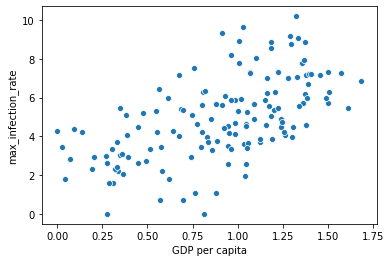

In [76]:
xaxis = new_df["GDP per capita"]
yaxis = new_df["max_infection_rate"]
sns.scatterplot(xaxis,np.log(yaxis))

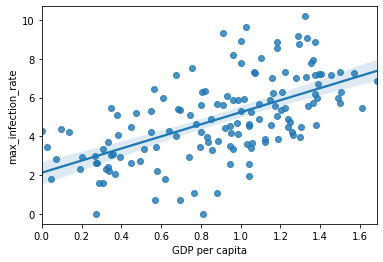

In [77]:
sns.regplot(xaxis, np.log(yaxis))

GDP per capita  -> 
Social support  -> 
Healthy life expectancy  -> 
Freedom to make life choices  -> 


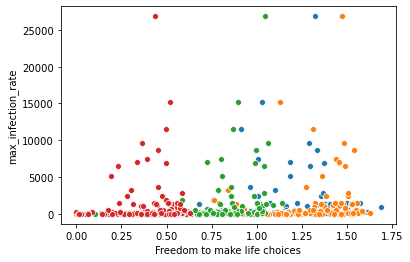

In [96]:
#from time import sleep
#xcon = list(new_df.head(0))
#xcon = xcon[1:]
#for i in xcon:
#    xaxis = new_df[i]
#    sns.scatterplot(xaxis,yaxis)
#    sns.regplot(xaxis,yaxis)
#    sleep(5)

### Task 5.2: Plotting Social support vs maximum Infection rate

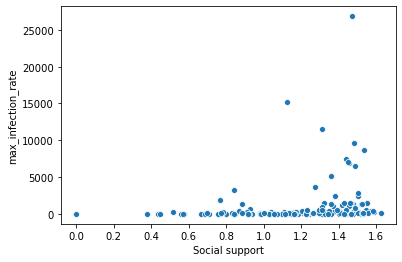

In [99]:
xaxis = new_df["Social support"]
yaxis = new_df["max_infection_rate"]
sns.scatterplot(xaxis,np.log(yaxis))

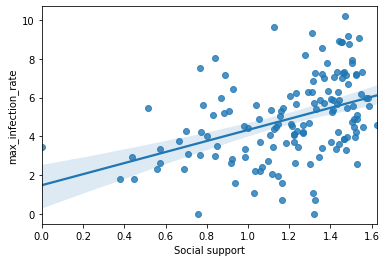

In [100]:
sns.regplot(xaxis,np.log(yaxis))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

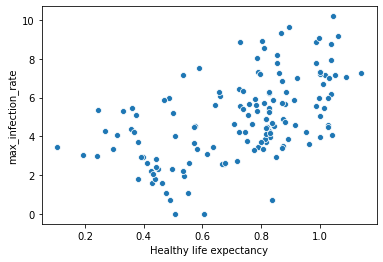

In [102]:
xaxis = new_df["Healthy life expectancy"]
yaxis = new_df["max_infection_rate"]
sns.scatterplot(xaxis,np.log(yaxis))

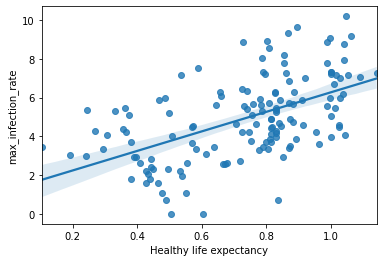

In [103]:
sns.regplot(xaxis,np.log(yaxis))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

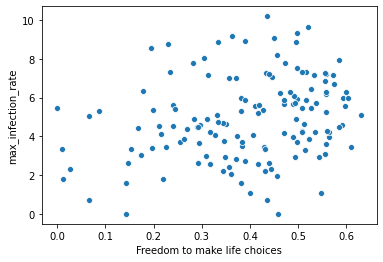

In [106]:
xaxis = new_df["Freedom to make life choices"]
yaxis = new_df["max_infection_rate"]
sns.scatterplot(xaxis,np.log(yaxis))

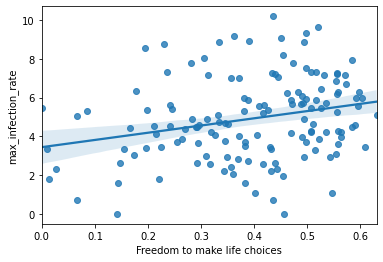

In [107]:
sns.regplot(xaxis,np.log(yaxis))